# AB Testing

**A/B testing (also known as split testing or bucket testing) is a method of comparing two versions of a things  against each other to determine which one performs better.**

**Import libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
pearsonr, spearmanr, kendalltau, f_oneway, kruskal

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### 1) Population and Sample

A population is the entire group that you want to draw conclusions about.

A sample is the specific group that you will collect data from.

**Create a age population and check population mean**

In [10]:
population = np.random.randint(0, 80, 10000)

In [12]:
population.mean()

39.4772

**Now get a sample from population and check the sample mean**

In [21]:
np.random.seed(115)

In [24]:
sample = np.random.choice(a=population, size=100)

In [25]:
sample.mean()

42.01

**Create 10 samples from  population and check the all samples mean**

In [26]:
np.random.seed(20)

In [31]:
mean_samples=[]

In [32]:
for samp in range(10):
    mean_samples.append(np.random.choice(a=population, size=100).mean())

In [37]:
sum(mean_samples) / len(mean_samples)

39.67800000000001

**Note: More samples mean allows us to represent the actual population mean**

### 2) Descriptive Statistics

In [38]:
df = sns.load_dataset('tips')

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


### 3) Confiedence Intervals

A confidence interval is the mean of your estimate plus and minus the variation in that estimate.

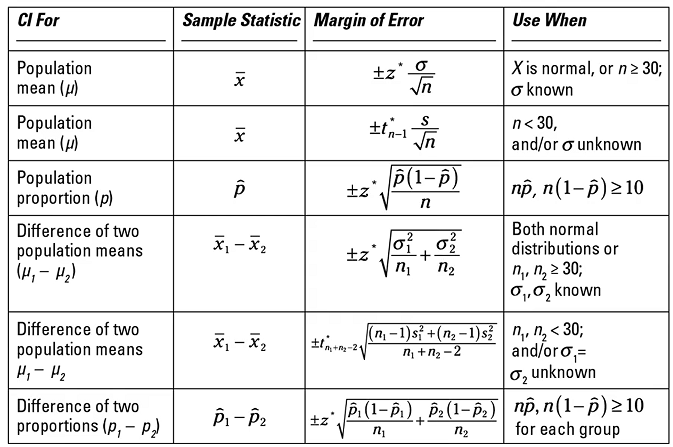

**Describe the total_bill and calculate confident ınterval for %95**

In [46]:
df['total_bill'].describe()

count   244.00000
mean     19.78594
std       8.90241
min       3.07000
25%      13.34750
50%      17.79500
75%      24.12750
max      50.81000
Name: total_bill, dtype: float64

In [48]:
sms.DescrStatsW(df['total_bill']).tconfint_mean()

(18.66333170435847, 20.908553541543164)

**Describe the tips and calculate confident ınterval for %95**

In [49]:
df['tip'].describe().T

count   244.00000
mean      2.99828
std       1.38364
min       1.00000
25%       2.00000
50%       2.90000
75%       3.56250
max      10.00000
Name: tip, dtype: float64

In [51]:
sms.DescrStatsW(df['tip']).tconfint_mean()

(2.8237993062818205, 3.172758070767359)

### 4) Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Correalation value change between -1 and 1.

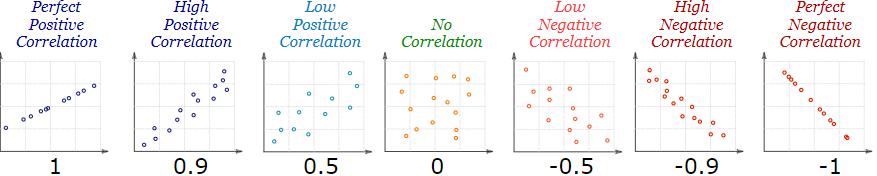


In [53]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [58]:
df['bill'] = df['total_bill'] - df['tip']

In [61]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,bill
0,16.99000,1.01000,Female,No,Sun,Dinner,2,15.98000
1,10.34000,1.66000,Male,No,Sun,Dinner,3,8.68000
2,21.01000,3.50000,Male,No,Sun,Dinner,3,17.51000
3,23.68000,3.31000,Male,No,Sun,Dinner,2,20.37000
4,24.59000,3.61000,Female,No,Sun,Dinner,4,20.98000


In [60]:
df.drop('bil', inplace=True, axis=1)

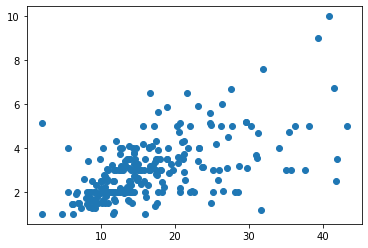

In [62]:
plt.scatter(df['bill'], df['tip'])

In [64]:
df['tip'].corr(df['bill'])

0.5766634471096374

In [66]:
df.corr()

,total_bill,tip,size,bill
total_bill,1.00000,0.67573,0.59832,0.99191
tip,0.67573,1.00000,0.48930,0.57666
size,0.59832,0.48930,1.00000,0.57883
bill,0.99191,0.57666,0.57883,1.00000


### 5) AB Test (Independent Samples T Test)

The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal or not. A two-sample t-test is used to analyze the results from A/B tests. You can use the test when your data values are independent, are randomly sampled from two normal populations and the two independent groups have equal variances.

AB Testing Steps:

* 1- Create a hypothesis
* 2- Assumptions check
  * Assumption 1: Distributions are normal for each variable
  * Assumption 2: Variances are homogeneus
* 3- Apply the hypothesis and control p value. If p value is less than 0.05 we can reject the HO if not we can accept HO. 
 * a) If the assumptions are correct use the independent samples t-test (parametric test, t test)
 * b) If the assumptions are not correct use the mannehitneyu test (non-parametric test, mannwhitneyu)
 
**Note**: If assumption 1 is not correct we can use directly non-parametric test (option b). If assumption 1 is correct but assumption 2 is not, we can use the parametric test and add that variances are not homogeneus as a argument.

___

### Case Study

Problem: Is there any average total bill difference between smoker and non-smoker ?

**Step 1: Create Hypothesis**

Hypothesis (H0): Smoker and non-smoker have same total average bill.

u1 = Average total bill of smoker<br>
u2 = Average total bill of non-smoker

HO: u1 = u2<br>
H1: u1 != u2

In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,bill
0,16.99000,1.01000,Female,No,Sun,Dinner,2,15.98000
1,10.34000,1.66000,Male,No,Sun,Dinner,3,8.68000
2,21.01000,3.50000,Male,No,Sun,Dinner,3,17.51000
3,23.68000,3.31000,Male,No,Sun,Dinner,2,20.37000
4,24.59000,3.61000,Female,No,Sun,Dinner,4,20.98000


In [69]:
df.groupby('smoker').agg({'total_bill': 'mean'})

,total_bill
smoker,
Yes,20.75634
No,19.18828


**Note:** There is a difference between smokers and non-smokers average bills. But it can be random. So we should check that it is statistically correct or not.

**Step 2: Assumption Check**

Assumption 1: Distributions are normal for each variable (Use shapiro test for normal distribution)<br>
Assumption 2: Variances are homogeneus<br>

Assumption 1:

H0: Distribution is normal. <br>
H1: Distrubution is not mormal.

In [77]:
test_stat, p_value = shapiro(df.loc[df['smoker'] == 'Yes', 'total_bill'])
print(f'Test statistic: %.5f, p value: %.5f' % (test_stat, p_value))

Test statistic: 0.93674, p value: 0.00022


**Note:** if p value is less than 0.05 we can reject the HO if not we can accept HO. In this case, p value is less than 0.05 so we can say that distribution is not normal for smokers.

In [73]:
shapiro(df.loc[df['smoker'] == 'Yes', 'total_bill'])

ShapiroResult(statistic=0.9367440938949585, pvalue=0.0002166620979551226)

In [79]:
test_stat, p_value = shapiro(df.loc[df['smoker'] == 'No', 'total_bill'])
print(f'Test statistic: %.5f, p value: %.5f' % (test_stat, p_value))

Test statistic: 0.90453, p value: 0.00000


**Note:** P value is less than 0.05 so we can say that distribution is not normal for non-smokers.

Assumption 2:

H0: Variances are homogeneus. <br>
H1: Variances are not homogeneus.

In [81]:
test_stat, p_value = levene(df.loc[df['smoker'] == 'Yes', 'total_bill'],
                           df.loc[df['smoker'] == 'No', 'total_bill'])
print(f'Test statistic: %.5f, p value: %.5f' % (test_stat, p_value))

Test statistic: 4.05373, p value: 0.04518


**Note:** P value is less than 0.05 so we can say that variances are not homogeneous for both of them.

**Step 3: Apply Hypothesis**

Assuptions are not correct that's why we can go directly non parametric test.

In [82]:
test_stat, p_value = mannwhitneyu(df.loc[df['smoker'] == 'Yes', 'total_bill'],
                           df.loc[df['smoker'] == 'No', 'total_bill'])
print(f'Test statistic: %.5f, p value: %.5f' % (test_stat, p_value))

Test statistic: 7531.50000, p value: 0.34133



**Note:** P value is greater than 0.05 so we should accept the HO hypothesis, which is average mean bill of smoker and non-smoker is same.

___

**Alternative Step: If the assumptions was correct we could use the parametric test (t test)**


In [83]:
test_stat, p_value = ttest_ind(df.loc[df['smoker'] == 'Yes', 'total_bill'],
                           df.loc[df['smoker'] == 'No', 'total_bill'])
print(f'Test statistic: %.5f, p value: %.5f' % (test_stat, p_value))

Test statistic: 1.33844, p value: 0.18201


**Note:** We get same result. P value is grater than 0.05 so we should accept the H0 hypothesis.